# Naive Backtracking

The Naive Backtracking algorithm is essentially DFS.  We take a puzzle, and keep trying all the possible valid numbers in each space

To Demonstrate the efficay, we will show some metrics wit this notebook for differt problems.

First, we will compare the number of attempts the backtracking algorithm to the number of squares that is already filled to the problem

It would be usefullt o create a `SudokuGenerorator` function, but for now, we are going to use a folder we already have

1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10
[0, 16.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11
[0, 16.0, 0, 0, 0, 0, 0, 0, 0, 0, 11.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12
[0, 16.0, 0, 0, 0, 0, 0, 0, 0, 0, 11.7, 13.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13
[0, 16.0, 0, 0, 0, 0, 0, 0, 0, 0, 11.7, 13.4, 13.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

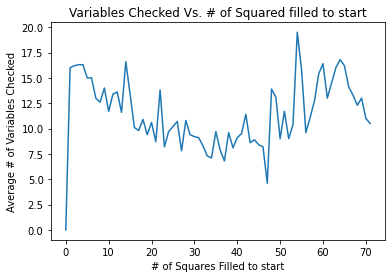

In [8]:
from os import listdir
from src.sudoku_solver import SudokuSolver
import matplotlib.pyplot as plt

INITAL_FOLDER = "./sudoku_problems"

AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE = [0] * 71
for foler_name in listdir(INITAL_FOLDER):
    problem_size = int(foler_name)
    num_problems_of_size = 0
    total_attempts = 0
    for file_name in listdir(f"{INITAL_FOLDER}/{foler_name}"):
        problem_path = f"{INITAL_FOLDER}/{foler_name}/{file_name}"
        solver = SudokuSolver(problem_path)
    
        # print(f'=============================================================')
        # print(f'Naive Backtracking {problem_path}\n\n')
        # print(f'Intial Problem:\n{solver.initial_puzzle}\n\n')

        solution, num_attempts = solver.naive_back_tracking(max_attempts=10000)
        # print(f"Solution:\n{solution}\n\nNumber of Attempts : {num_attempts}\n\n")
        
        num_problems_of_size += 1
        total_attempts += num_attempts

    print(problem_size)
    print(AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE)    
    AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE[problem_size-1] = total_attempts/num_problems_of_size

print(AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE)

plt.plot(AVERAGE_NAIVE_ATTEMPTS_BY_PROBLEM_SIZE)
plt.ylabel("Average # of Variables Checked")
plt.xlabel("# of Squares Filled to start")
plt.title("Variables Checked Vs. # of Squared filled to start")
plt.show()